# Ejercicio de programación Regresión Lineal Multiple

In [21]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [22]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# 2. Cargar dataset
file_path = "/content/gdrive/MyDrive/SIS420-INTELIGENCIA ARTIFICIAL/DATASET/online_shoppers_intention.csv"  # Ajusta la ruta si está en tu Drive
df = pd.read_csv(file_path)

## 2 Visualizar


In [25]:
# 3. Mostrar tamaño del dataset
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (12330, 18)


In [26]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [27]:
# Copiar el dataset original
df_clean = df.copy()

# 1. Convertir columnas booleanas a números
df_clean["Weekend"] = df_clean["Weekend"].astype(int)
df_clean["Revenue"] = df_clean["Revenue"].astype(int)

# 2. Convertir columnas categóricas (Month y VisitorType) a variables numéricas
df_clean = pd.get_dummies(df_clean, columns=["Month", "VisitorType"], drop_first=True)

# 3. Definir variables predictoras (X) y variable objetivo (y)
X = df_clean.drop(columns=["Revenue"]).to_numpy()  # todas las columnas excepto Revenue
y = df_clean["Revenue"].to_numpy()

# Verificar resultado
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

# Ver columnas en DataFrame
print("\nColumnas finales de X (pandas):\n", df_clean.drop(columns=["Revenue"]).columns)



Dimensiones de X: (12330, 26)
Dimensiones de y: (12330,)

Columnas finales de X (pandas):
 Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')


In [31]:
# Seleccionar solo 2 variables predictoras
X_columns = ["Administrative", "PageValues"]

X = df_clean[X_columns].to_numpy()
y = df_clean["Revenue"].to_numpy()

# Normalizar
X_norm, mu, sigma = featureNormalize(X)

# Agregar columna de 1's para el bias
m = y.size


print("Número de ejemplos (m):", m)
print("Número de características (n):", X.shape[1])  # debería dar 3 (bias + 2 variables)


Número de ejemplos (m): 12330
Número de características (n): 2


In [32]:
print(X)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [4. 0.]
 [0. 0.]]


In [33]:
print(y)

[0 0 0 ... 0 0 0]


In [35]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [36]:
# Convertir X a float
X = X.astype(float)

# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [4. 0.]
 [0. 0.]]
Media calculada: [2.31516626 5.88925786]
Desviación estandar calculada: [ 3.3216494  18.56768361]
[[-0.69699296 -0.31717784]
 [-0.69699296 -0.31717784]
 [-0.69699296 -0.31717784]
 ...
 [-0.69699296 -0.31717784]
 [ 0.50722805 -0.31717784]
 [-0.69699296 -0.31717784]]


Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [37]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [38]:
print(X)

[[ 1.         -0.69699296 -0.31717784]
 [ 1.         -0.69699296 -0.31717784]
 [ 1.         -0.69699296 -0.31717784]
 ...
 [ 1.         -0.69699296 -0.31717784]
 [ 1.          0.50722805 -0.31717784]
 [ 1.         -0.69699296 -0.31717784]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente

En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz $X$. La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
- (x^{(1)})^T - \\
- (x^{(2)})^T - \\
\vdots \\
- (x^{(m)})^T - \\ \\
\end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`.
</div>

<a id="computeCostMulti"></a>

In [39]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [40]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


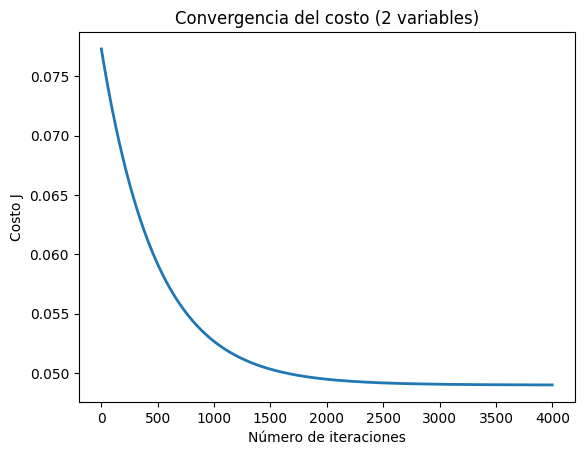

Theta calculado por el descenso por el gradiente: [0.15191595 0.03357989 0.17167727]
Primeras 100 predicciones:
[0.07405878 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.08416818 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.07405878 0.07405878 0.09427758 0.07405878 0.07405878
 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.07405878 0.11449638 0.07405878 0.07405878 0.58511564
 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.09427758 0.07405878 0.07405878 0.08416818 0.07405878
 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.07405878 0.07405878 0.29430456 0.07405878 0.09427758
 0.07405878 0.07405878 0.54957287 0.07405878 0.07405878 0.31626922
 0.11449638 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.07405878 0.07405878 0.07405878 0.28092188 0.07405878
 0.07405878 0.074

In [41]:
# Elegir algún valor para alpha (probar varias alternativas)
alpha = 0.001  # también puedes probar alpha = 0.003
num_iters = 4000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)   # 3 porque tienes bias + 2 variables
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Graficar la convergencia del costo
import matplotlib.pyplot as plt
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del costo (2 variables)')
plt.show()

# Muestra los resultados del descenso por el gradiente
print('Theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# ========================
# Predicciones con tu dataset
# ========================
y_pred = np.dot(X, theta)

# Mostrar primeras 100 predicciones
print("Primeras 100 predicciones:")
print(y_pred[:100])


In [42]:
X_array = [1, 1222, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [43]:
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa de 1222 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

El precio predecido para una casa de 1222 sq-ft y 3 dormitorios (usando el descenso por el gradiente): $12


#regresión polinómica

In [44]:
# Tomamos 4 features de ejemplo del dataset
X = df[["Administrative", "Administrative_Duration",
        "ProductRelated", "ProductRelated_Duration"]].to_numpy()

y = df["Revenue"].to_numpy()

m = y.shape[0]
print("Número de ejemplos:", m)
print("Shape de X:", X.shape)


Número de ejemplos: 12330
Shape de X: (12330, 4)


In [45]:
import matplotlib.pyplot as plt

def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.
    fig = plt.figure()  # abre una nueva figura

    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('Revenue (0 = No compra, 1 = Compra)')
    plt.xlabel('Administrative_Duration')
    plt.title('Relación entre Administrative_Duration y Revenue')
    plt.show()



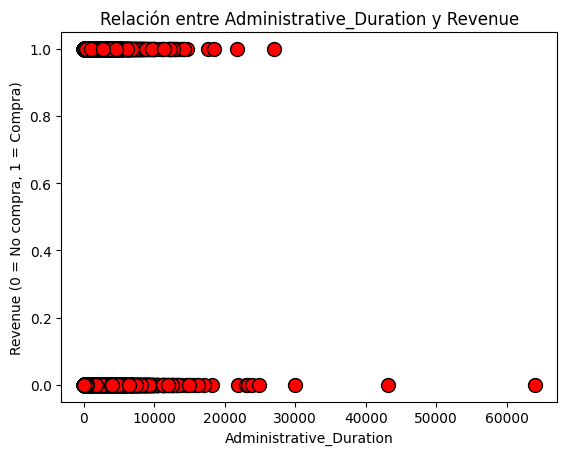

In [46]:
plotData(X, y)

In [47]:
X = np.concatenate([X, X * X], axis=1)

In [48]:
print(X)

[[0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  4.00000000e+00 4.09600000e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 6.00000000e+00 ... 0.00000000e+00
  3.60000000e+01 3.39480625e+04]
 [4.00000000e+00 7.50000000e+01 1.50000000e+01 ... 5.62500000e+03
  2.25000000e+02 1.19716000e+05]
 [0.00000000e+00 0.00000000e+00 3.00000000e+00 ... 0.00000000e+00
  9.00000000e+00 4.51562500e+02]]


In [49]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [123]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

In [50]:
print(X_norm)

[[-0.69699296 -0.31717784]
 [-0.69699296 -0.31717784]
 [-0.69699296 -0.31717784]
 ...
 [-0.69699296 -0.31717784]
 [ 0.50722805 -0.31717784]
 [-0.69699296 -0.31717784]]


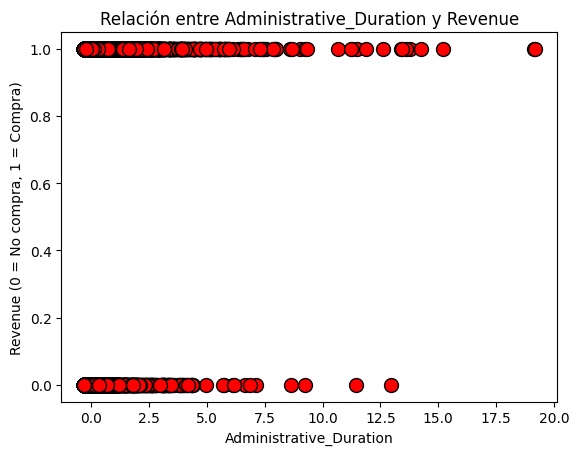

In [51]:
plotData(X_norm[:,1], y)

In [52]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [53]:
print(X)

[[ 1.         -0.69699296 -0.31717784]
 [ 1.         -0.69699296 -0.31717784]
 [ 1.         -0.69699296 -0.31717784]
 ...
 [ 1.         -0.69699296 -0.31717784]
 [ 1.          0.50722805 -0.31717784]
 [ 1.         -0.69699296 -0.31717784]]


 #Descenso por el gradiente

In [54]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [55]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [0.15474453 0.03292925 0.17488344]


ValueError: operands could not be broadcast together with shapes (8,) (2,) 

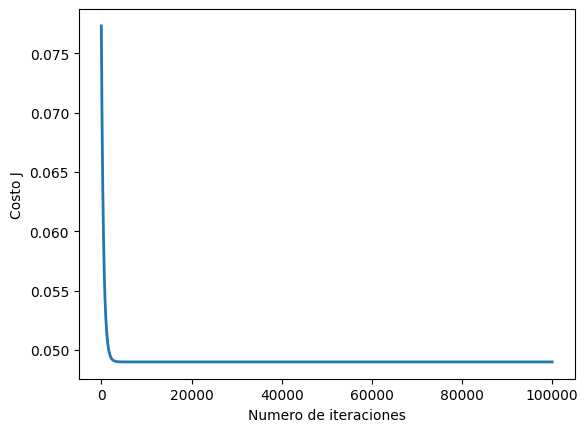

In [56]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de un ejemplo
X_array = np.array([34, 1156, 10, 5, 200, 50, 3, 7])    # tus 4 features

# Normalizamos
X_norm_input = (X_array - mu) / sigma

# Agregamos el bias
X_norm_input = np.insert(X_norm_input, 0, 1)

# Predicción
price = np.dot(X_norm_input, theta)

print('Predicción para el ejemplo dado (usando el descenso por el gradiente): {:.4f}'.format(price))


In [57]:
# ========================
# Continuación: 100 predicciones
# ========================

# Normalizamos TODO el dataset (X) con los mismos mu y sigma usados en entrenamiento

# Agregamos la columna de bias (unos)


# Mostrar las primeras 100 predicciones
print("\nPrimeras 100 predicciones del dataset:")
print(y_pred[:100])

# (Opcional) Comparar con los valores reales
print("\nComparación primeras 100 (Real vs Predicho):")
for real, pred in zip(y[:100], y_pred[:100]):
    print(f"Real: {real:.4f}  -  Predicho: {pred:.4f}")



Primeras 100 predicciones del dataset:
[0.07405878 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.08416818 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.07405878 0.07405878 0.09427758 0.07405878 0.07405878
 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.07405878 0.11449638 0.07405878 0.07405878 0.58511564
 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.09427758 0.07405878 0.07405878 0.08416818 0.07405878
 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.07405878 0.07405878 0.29430456 0.07405878 0.09427758
 0.07405878 0.07405878 0.54957287 0.07405878 0.07405878 0.31626922
 0.11449638 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.07405878 0.07405878 0.07405878 0.28092188 0.07405878
 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878 0.07405878
 0.07405878 0.07405878

<a id="section7"></a>
### Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente.

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$).

In [8]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [60]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 500, 5]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [0.15474453 0.03292925 0.17488344]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $17
